In [9]:
import pandas as pd

WorldCupShootouts = pd.read_csv("Datasets/WorldCupShootouts.csv")
WorldCupShootouts.head()

# https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


In [12]:
shootouts = (
    df.groupby("Game_id")
      .agg(
          teams=("Team", lambda x: sorted(x.unique())),
          n_penalties=("Penalty_Number", "max")
      )
      .reset_index()
)

In [13]:
game_id_to_year = {
    1: 1982,   # FRA vs GER
    2: 1986,   # BRA vs FRA
    3: 1986,   # GER vs MEX
    4: 1986,   # BEL vs SPA
    5: 1990,   # IRE vs ROM
    6: 1990,   # ARG vs YUG
    7: 1990,   # ARG vs ITA
    8: 1990,   # ENG vs GER
    9: 1994,   # BUL vs MEX
    10: 1994,  # RUM vs SWE
    11: 1994,  # BRA vs ITA (Final)
    12: 1998,  # ARG vs ENG
    13: 1998,  # FRA vs ITA
    14: 1998,  # BRA vs HOL
    15: 2002,  # IRE vs SPA
    16: 2002,  # KOR vs SPA
    17: 2006,  # SWZ vs UKR
    18: 2006,  # ARG vs GER
    19: 2006,  # ENG vs POR
    20: 2006,  # FRA vs ITA (Final)
    21: 2010,  # JAP vs PAR
    22: 2010,  # GHA vs URU
    23: 2014,  # BRA vs CHI
    24: 2014,  # CRA vs GRE
    25: 2014,  # CRA vs HOL
    26: 2014,  # ARG vs HOL
    27: 2018,  # RUS vs SPA
    28: 2018,  # CRO vs DEN
    29: 2018,  # COL vs ENG
    30: 2018   # CRO vs RUS
}

In [34]:
df["Year"] = df["Game_id"].map(game_id_to_year)
shootouts["Year"] = shootouts["Game_id"].map(game_id_to_year)
shootouts.sort_values("Year")[["Game_id", "teams", "Year"]].tail()

,Game_id,teams,Year
25,26,"[ARG, HOL]",2014
26,27,"[RUS, SPA]",2018
27,28,"[CRO, DEN]",2018
28,29,"[COL, ENG]",2018
29,30,"[CRO, RUS]",2018


In [28]:
PL_UCL_22_23 = pd.read_csv(
    "Datasets/Penaltys kicks PL UCL 22-23.csv",
    sep=";",
    encoding="latin1"   # or cp1252 if needed
)

PL_UCL_22_23.columns = [
    "Competition",
    "Match",
    "Date",
    "Shooter",
    "Goalkeeper",
    "Goal",
    "Off_target",
    "Saved",
    "Outcome_check",
    "Shot_height_zone",
    "Shot_width_zone",
    "Goalkeeper_dive",
    "Preferred_foot_shooter"
]

# https://www.kaggle.com/datasets/locmarigny/penaltys-kicks-pl-and-ucl?resource=download

In [29]:
month_map = {
    "janv": "Jan", "févr": "Feb", "mars": "Mar", "avr": "Apr",
    "mai": "May", "juin": "Jun", "juil": "Jul", "août": "Aug",
    "sept": "Sep", "oct": "Oct", "nov": "Nov", "déc": "Dec",
}

PL_UCL_22_23["Date"] = (
    PL_UCL_22_23["Date"]
    .replace(month_map, regex=True)
    .str.title()   # safety
)

In [37]:
PL_UCL_22_23.head()

,Competition,Match,Date,Shooter,Goalkeeper,Goal,Off_target,Saved,Outcome_check,Shot_height_zone,Shot_width_zone,Goalkeeper_dive,Preferred_foot_shooter
0,PL,WHU - AVL,12-Mar,Benrahma,Martinez,1,0,0,1,A,1,1,D
1,PL,CRY - MCI,11-Mar,Haaland,Guaita,1,0,0,1,C,1,3,G
2,PL,TOT - NOT,11-Mar,A. Ayew,Forster,0,0,1,1,B,2,1,G
3,PL,TOT - NOT,11-Mar,Kane,Navas,1,0,0,1,A,2,1,D
4,PL,BOU - LIV,11-Mar,Salah,Neto,0,1,0,1,A,0,3,G


In [36]:
len(PL_UCL_22_23)

101

In [38]:
PL_UCL_22_23.groupby("Competition").size()

Competition
PL     60
UCL    41
dtype: int64

In [41]:
PL_UCL_22_23[["Goal", "Off_target", "Saved"]].sum()

converted = PL_UCL_22_23["Goal"].sum()
total = len(PL_UCL_22_23)
converted / total

# xG penalty is around 0.76. 0.74 looks reasonable here.

0.7425742574257426

In [42]:
conversion_table = (
    PL_UCL_22_23
    .groupby(["Shot_height_zone", "Shot_width_zone"])
    .agg(
        converted=("Goal", "sum"),
        total=("Goal", "count")
    )
)

conversion_table["conversion_rate"] = (
    conversion_table["converted"] / conversion_table["total"]
)

conversion_table

converted  total  conversion_rate
Shot_height_zone Shot_width_zone                                   
A                0                        0      1         0.000000
                 1                       12     13         0.923077
                 2                        3      3         1.000000
                 3                        7      7         1.000000
B                1                        5     11         0.454545
                 2                        6      9         0.666667
                 3                        3      5         0.600000
C                0                        0      1         0.000000
                 1                       21     26         0.807692
                 2                        3      5         0.600000
                 3                       15     17         0.882353
                 4                        0      1         0.000000
O                1                        0      1         0.000000
                 2                        0      1         0.000000

In [49]:
zone_rates = (
    PL_UCL_22_23
    .groupby(["Shot_height_zone", "Shot_width_zone"])["Goal"]
    .mean()
    .reset_index()
)

In [50]:
zone_rates = (
    PL_UCL_22_23
    .groupby(["Shot_height_zone", "Shot_width_zone"])["Goal"]
    .mean()
    .reset_index()
)

In [51]:
goal_width = 7.32
goal_height = 2.44

# 3 vertical slices
width_bins = {
    1: (0.00, goal_width / 3),
    2: (goal_width / 3, 2 * goal_width / 3),
    3: (2 * goal_width / 3, goal_width)
}

# 3 horizontal slices
height_bins = {
    "C": (0.00, goal_height / 3),              # bottom
    "B": (goal_height / 3, 2 * goal_height / 3),
    "A": (2 * goal_height / 3, goal_height)    # top
}

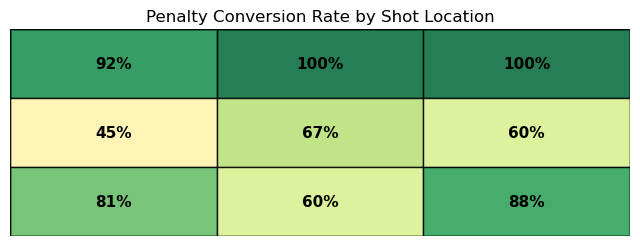

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(8, 3.5))

goal_width = 7.32
goal_height = 2.44

# Goal frame
ax.add_patch(
    Rectangle((0, 0), goal_width, goal_height,
              fill=False, edgecolor="black", linewidth=2)
)

# Colour scale
norm = colors.Normalize(vmin=0, vmax=1)
cmap = matplotlib.colormaps["RdYlGn"]

for _, row in zone_rates.iterrows():
    wz = row["Shot_width_zone"]
    hz = row["Shot_height_zone"]

    # Skip shots not inside the goal
    if wz not in width_bins or hz not in height_bins:
        continue

    x0, x1 = width_bins[wz]
    y0, y1 = height_bins[hz]

    rect = Rectangle(
        (x0, y0),
        x1 - x0,
        y1 - y0,
        facecolor=cmap(norm(row["Goal"])),
        edgecolor="black",
        alpha=0.85
    )
    ax.add_patch(rect)

    ax.text(
        (x0 + x1) / 2,
        (y0 + y1) / 2,
        f"{row['Goal']:.0%}",
        ha="center",
        va="center",
        fontsize=11,
        fontweight="bold"
    )

ax.set_xlim(0, goal_width)
ax.set_ylim(0, goal_height)
ax.set_aspect("equal")
ax.axis("off")

plt.title("Penalty Conversion Rate by Shot Location")
plt.show()


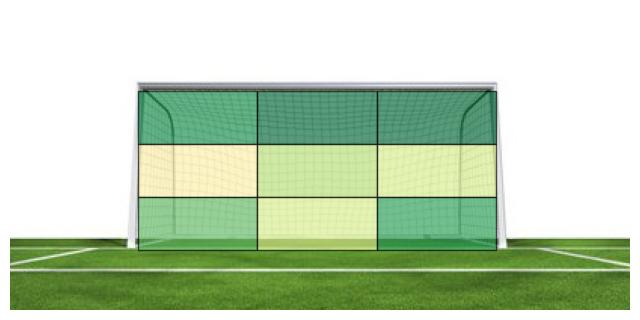

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

img = mpimg.imread("Images and others/soccer goal-2.jpg")

fig, ax = plt.subplots(figsize=(8, 4))

# Show full image at its natural size (0→width, 0→height)
ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], zorder=0)

# Define goal pixel bounds
goal_x_start_px = 85
goal_x_end_px = 322
goal_y_start_px = 40
goal_y_end_px = 145

# Map zones to goal coordinates (0-7.32, 0-2.44)
x_scale = (goal_x_end_px - goal_x_start_px) / 7.32
y_scale = (goal_y_end_px - goal_y_start_px) / 2.44

# Overlay zones in pixels
for _, row in zone_rates.iterrows():
    wz = row["Shot_width_zone"]
    hz = row["Shot_height_zone"]

    if wz not in width_bins or hz not in height_bins:
        continue

    x0, x1 = width_bins[wz]
    y0, y1 = height_bins[hz]

    # Convert to pixel coordinates
    px0 = goal_x_start_px + x0 * x_scale
    px1 = goal_x_start_px + x1 * x_scale
    py0 = goal_y_start_px + y0 * y_scale
    py1 = goal_y_start_px + y1 * y_scale

    ax.add_patch(
        Rectangle(
            (px0, py0),
            px1 - px0,
            py1 - py0,
            facecolor=cmap(norm(row["Goal"])),
            alpha=0.65,
            edgecolor="black",
            zorder=2
        )
    )

ax.axis("off")
plt.show()
